# Práctica Nro. 3

[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/manuxch/calculo_avanzado/blob/main/03-laplace/code/practica_03.ipynb)

En esta práctica se utiliza el módulo sympy para el cálculo simbólico y operaciones de cálculo diferencial e integral. Se puede obtener ayuda en:
- [Evaluación numérica](https://docs.sympy.org/latest/modules/evalf.html)
- [Cálculo diferencial e integral](https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html)
- [Integrales (de Laplace)](https://docs.sympy.org/latest/modules/integrals/integrals.html)

**Nota:** Para que la transformada de Laplace de SymPy pueda devolver expresiones de derivadas de funciones desconocidas hay que utilizar una versión > 1.10.

In [1]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from sympy import (DiracDelta, exp, cos, sin, laplace_transform, Heaviside, collect, lambdify,
                   symbols, Function, inverse_laplace_transform, Eq, diff, solve, plot, Subs)
from sympy.abc import t, s, a
sym.init_printing()

# Opciones para hacer las figuras
mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['figure.figsize'] = (6.4, 4.8)
mpl.rcParams['legend.fontsize'] = 16

## Ejercicio 1

La integral de la transformada de Laplace se puede obtener de alguna tabla, lo que resulta en:
\begin{align}
\mathscr{L}(f)(s) &= \int_0^{\infty} e^{-st} \cos at \, dt   \\
&= \lim_{M \rightarrow \infty} \int_0^{M} e^{-st} \cos at \, dt   \\
&= \lim_{M \rightarrow \infty} \left. \frac{e^{-st} (a \sin at - s \cos at)}{s^2 + a^2} \right|_0^M
&= \frac{s}{s^2 + a^2}
\end{align}

Alternativamente, podemos resolverlo de otro modo recordando de la teoría que

$$ \mathscr{L}[e^{at}](s) = \frac{1}{s - a} $$

Si reemplazamos $a$ por $a i$ tenemos:
\begin{align}
\mathscr{L}[e^{ait}](s) &= \mathscr{L}[\cos at + i \sin at](s) \\
&= \mathscr{L}[\cos at](s) + i \mathscr{L}[\sin at](s) \tag{1.1}\\
&= \frac{1}{s - a i} = \frac{1}{s - a i} \frac{s + ai}{s + ai} = \frac{s + a i}{s^2 + a^2} \\
&= \frac{s}{s^2 + a^2} + i \frac{a}{s^2 + a^2} \tag{1.2}
\end{align}

Igualando las partes real e imaginarias de (1.1) y (1.2), obtenemos:
$$ \mathscr{L}[\cos at](s) = \frac{s}{s^2 + a^2}, \quad \mathscr{L}[\sin at](s) = \frac{a}{s^2 + a^2} $$

Ahora vamos a resolverlo utilizando los recursos de cálculo simbólico que provee SymPy. 

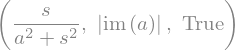

In [2]:
f = cos(a*t)
laplace_transform(f, t, s)

La función `laplace_transfrom()` devuelve una tupla en la que el primer elemento es la transformada $F(s) = \mathscr{L}(f)$, el segundo es el semiplano de convergencia y el tercer elemento son condiciones de convergencia auxiliares. Si solo queremos obtener $F(s)$ podemos especificar el elemento cero de la tupla:

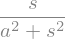

In [3]:
laplace_transform(f, t, s)[0]

## Ejercicio 2

Hemos visto que 
$$ \mathscr{L}(t^n) = \frac{n!}{s^{n + 1}} \tag{2.1} $$ 
es válida para $n = 0$, ya que en ese caso, como vimos en la teoría y considerando que $0! = 1$:
$$ \mathscr{L}(t^0) = \mathscr{L}(1) = \frac{1}{s} $$

Entonces proponemos la hipótesis de inducción y asumimos que (2.1) vale para algún entero $n \geq 0$, y probaremos que vale entonces para $n + 1$. Integrando por partes (2.1) tenemos
\begin{align}
\mathscr{L}(t^{n + 1}) &= \int_0^{\infty} e^{-st} t^{n+1} \, dt \\
&= \left. -\frac{1}{s} e^{-st} t^{n+1} \right|_0^{\infty} + \frac{n + 1}{s} \int_0^{\infty} e^{-st} t^n \, dt
\end{align}
En la última expresión, la parte sin integral es nula al evaluarla en los límites, mientras que el segundo término es $(n + 1)/s$ veces $\mathscr{L}(t^n)$. De aquí, y por la hipótesis de inducción:
$$ \mathscr{L}(t^{n + 1}) = \frac{n + 1}{s} \mathscr{L}(t^{n}) = \frac{n + 1}{s}  \frac{n!}{s^{n + 1}} = \frac{(n + 1)!}{s^{n + 2}} $$
Esto prueba la fórmula (2.1).

## Ejercicio 3

Para hallar la transformada de $H(t-a)$ utilizamos directamente la definición:
\begin{align}
\mathscr{L}[H(t-a)](s) &= \int_0^{\infty} e^{-st} H(t-a) \, dt \\
&= \int_0^{\infty} e^{-st} 1 \, dt = \left. -\frac{e^{-st}}{s} \right|_{t = a}^{\infty}
\end{align}

En la última expresión, el límite inferior de integración es $t = a$ dado que por la definición de $H(t-a)$, esta función es nula para $t < a$.Por lo tanto:
$$ \mathscr{L}`H(t - a)](s) = \frac{e^{-as}}{s} $$

SymPy tiene definida la función Heaviside, con la particularidad de que $H(0) = 1/2$, aunque esto puede ser redefinido en la misma función utilizando como argumento `H0`. 

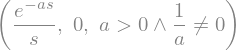

In [4]:
laplace_transform(Heaviside(t - a), t, s)

Obtenemos el mismo resultado anterior para $F(s)$, con la condición de convergencia $a > 0$, y por las condiciones suplementarias de convergencia vemos que $a$ debe ser un número real positivo distinto de cero.

## Ejercicio 4

Llamemos $Y(s)$ a $\mathscr{L}[y](s)$. Tomamos la transformada de Laplace de la ecuación diferencial utilizando la linealidad de $\mathscr{L}$ y la propiedad de la transformada de $y'(t)$:
\begin{align}
\mathscr{L}[y' - 4 y](s) &= \mathscr{L}[y'](s) - 4 \mathscr{L}[y](s) \\
&= [s Y(s) - y(0)] - 4 Y(s) = \mathscr{L}[1](s) = \frac{1}{s}
\end{align}
donde usamos que $\mathscr{L}[1] = 1 / s$ para $s > 0$. Ahora tenemos:
$$ (s - 4) Y(s) = y(0) + \frac{1}{s} = 1 + \frac{1}{s} $$
que representa una ecuación algebraica en la función incógnita $Y(s)$. Al resolverla obtenemos:
$$ Y(s) = \frac{1}{s - 4} + \frac{1}{s (s - 4)} $$

La solución entonces del problema con valores iniciales se obtiene anti transformando la expresión anterior:
$$ y = \mathscr{L}^{-1}[Y] = \mathscr{L}^{-1} \left[ \frac{1}{s - 4} \right] + \mathscr{L}^{-1} \left[ \frac{1}{s (s - 4)} \right] $$

Podemos obtener las anti transformadas consultando una tabla de transformadas de Laplace, o le podemos pedir a SymPy que haga ese trabajo por nosotros:

In [5]:
inverse_laplace_transform(1/(s - 4), s, t)

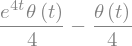

In [6]:
inverse_laplace_transform(1/(s * (s - 4)), s, t)

En estas expresiones, $\theta(t)$ es la representación de SymPy de la función Heaviside $H(t)$. Dado que buscamos la solución para $t > 0$, el resultado del problema con valores iniciales es
\begin{align}
y(t) &= e^{4 t} + \frac{1}{4} \left( e^{4 t} - 1 \right) \\
&= \frac{5}{4} e^{4 t} - \frac{1}{4}
\end{align}

Vamos a resolver el problema íntegramente utilizando el poder de cálculo simbólico de SymPy. Primero definimos los símbolos que vamos a utilizar para representar el problema de valores iniciales:

In [7]:
s, t = symbols('s t')
y = Function('y')
Y = laplace_transform(y(t), t, s)

A continuación definimos la ecuación diferencial:

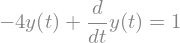

In [8]:
ec_dif = Eq(y(t).diff(t) - 4 * y(t),  1)
ec_dif

y también las condiciones iniciales, en forma de diccionario de Python:

In [9]:
cond_ini = {y(0): 1}

In [10]:
laplace_transform(ec_dif.lhs, t, s)[0]

Vemos que la transformada del miembro izquierdo de nuestra ecuación diferencial aplica la regla de la transformada de la derivada de $y(t)$, en la que aparece el valor inicial de la función $y(0)$.

Ahora definimos la ecuación algebraica tomando las transformadas de Laplace del miembro izquierdo y derecho, respectivamente, de `ec_dif`:

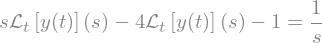

In [11]:
ec_alg = Eq(laplace_transform(ec_dif.lhs, t, s)[0].subs(cond_ini), laplace_transform(ec_dif.rhs, t, s)[0])
ec_alg

Notemos que al transformar el primer miembro de la ecuación diferencial, incorporamos la condición inicial utilizando una substitución con `subs(cond_ini)`.

El paso siguiente es resolver la ecuación algebraica en términos de $Y(s)$:

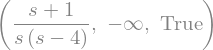

In [12]:
sol_Y = solve(ec_alg, Y)[0]
sol_Y

Para finalizar el problema, debemos anti transformar $Y(s)$ para obtener $y(t)$:

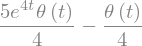

In [13]:
y_sol = inverse_laplace_transform(sol_Y[0], s, t)
y_sol

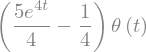

In [14]:
collect(y_sol, Heaviside(t))

Como dijimos más arriba, $\theta(t)$ representa la función Heaviside, por lo que para $t > 0$ la solución del problema está en la expresión entre paréntesis, que coincide con el resultado que obtuvimos antes.

## Ejercicio 5

El procedimiento para resolver este problema es análogo al anterior. Aplicamos la transformada de Laplace a la ecuación diferencial, denotando por $Y(s)$ a $\mathscr{L}[y](s)$:
\begin{align}
\mathscr{L}[y' + 4 y](s) &= \mathscr{L}[y'](s) + 4 \mathscr{L}[y](s) \\
&= [s Y(s) - y(0)] + 4 Y(s) = \mathscr{L}[\cos t](s) = \frac{s}{s^2 + 1}
\end{align}
Sabiendo que la condición inicial es $y(0) = 0$, despejando $Y(s)$ del problema algebraico obtenemos:
\begin{align}
(s + 4) Y(s) &= \frac{s}{s^2 + 1} \\
Y(s) &= \frac{1}{s + 4} \frac{s}{s^2 + 1}
\end{align}
La forma apropiada de $Y(s)$ para obtener la transformada inversa es descomponiendo el resultado anterior en fracciones simples. Esto lo puede hacer SymPy con la función `apart`:

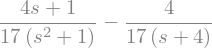

In [15]:
Y_fs = sym.apart(1/(s + 4) * s / (s**2 + 1))
Y_fs

La transformación inversa de Laplace también es una operación lineal, por lo que al aplicarla a la expresión anterior, término a término, obtenemos:

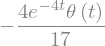

In [16]:
inverse_laplace_transform(Y_fs.args[0], s, t)

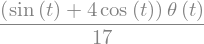

In [17]:
inverse_laplace_transform(Y_fs.args[1], s, t)

La solución entonces del problema de valores iniciales es:
$$ y(t) = -\frac{4}{17} e^{-4t} + \frac{4}{17} \cos t + \frac{1}{17} \sin t, \quad t > 0 $$

Ahora resolvemos el problema enteramente con SymPy. Inicialmente definimos las funciones, la ecuación diferencial y la condición inicial $y(0)= 0$:

In [18]:
s, t = symbols('s t')
y = Function('y')
Y = laplace_transform(y(t), t, s)

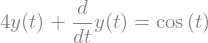

In [19]:
ec_dif = Eq(y(t).diff(t) + 4 * y(t),  cos(t))
ec_dif

In [20]:
cond_ini = {y(0): 0}

Tomamos la transformada de Laplace de la ecuación diferencial:

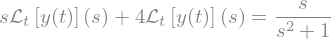

In [21]:
ec_alg = Eq(laplace_transform(ec_dif.lhs, t, s)[0].subs(cond_ini), laplace_transform(ec_dif.rhs, t, s)[0])
ec_alg

Resolvemos el problema algebraico despejando $Y(s)$:

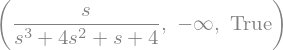

In [22]:
sol_Y = solve(ec_alg, Y)[0]
sol_Y

Tomamos la transformada inversa de $Y(s)$ para obtener $y(t)$:

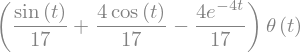

In [23]:
y_sol = inverse_laplace_transform(sol_Y[0], s, t)
collect(y_sol, Heaviside(t))

El resultado coinicide con el que obtuvimos previamente. Vamos a representar gráficamente la solución obtenida de $y(t)$ de nuestra ecuación diferencial como respuesta a la **entrada** $\cos(t)$. Para ello primeramente tenemos que pasar nuestra función simbólica `y_sol` a una función numérica de numpy `y_np`, lo que nos permitirá representarla gráficamente:

In [24]:
y_np = lambdify(t, y_sol, 'numpy')

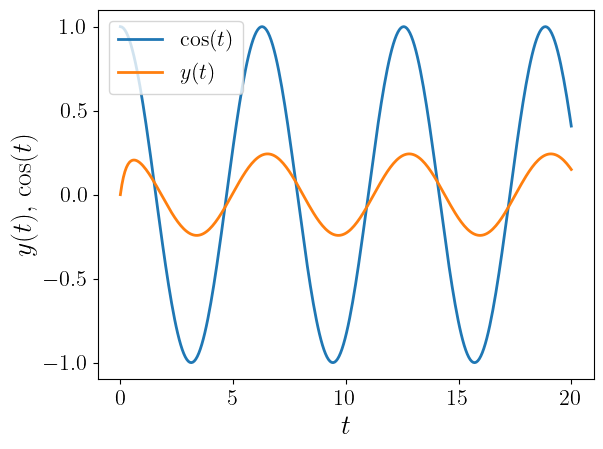

In [25]:
fig, ax = plt.subplots() 
t_n = np.linspace(0, 20, 300)
y_num = y_np(t_n)
plt.plot(t_n, np.cos(t_n), label=r"$\cos(t)$")
plt.plot(t_n, y_num, lw=2, label=r"$y(t)$")
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t), \, \cos(t)$')
plt.legend()
plt.show()

## Ejercicio 6

Este ejercicio es un poco más complejo que los anteriores debido a que en la ecuación diferencial aparece una derivada segunda de la función incógnita, pero la secuencia de pasos para resolverlo es la misma que para los ejercicios 5 y 6. Vamos a resolverlo utilizando solo los métodos de SymPy.

Primero definimos los símbolos a utilizar, la ecuación diferencial y las condiciones iniciales:

In [26]:
s, t = symbols('s t')
y = Function('y')
Y = laplace_transform(y(t), t, s)

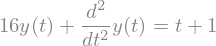

In [27]:
ec_dif = Eq(y(t).diff(t, 2) + 16 * y(t),  1 + t)
ec_dif

In [28]:
cond_ini = {y(0): -1, Subs(diff(y(t), t), t, 0): 1}

En las condiciones iniciales se suma, a diferencia de los ejercicios anteriores, el valor $y'(0) = 1$. Para ello tenemos que usar la función `Subs()`, que representa sustituciones no evaluadas en una expresión (ver la documentación de esta función [aquí](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.Subs)).

Ahora aplicamos la transformada de Laplace a la ecuación diferencial. Notar que al tener una derivada segunda de la función incógnita $y(t)$, aparece un término en $s^2$ en la ecuación algebraica para $Y(s)$:

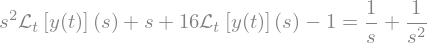

In [29]:
ec_alg = Eq(laplace_transform(ec_dif.lhs, t, s)[0].subs(cond_ini), laplace_transform(ec_dif.rhs, t, s)[0])
ec_alg

Resolvemos a continuación la ecuación algebraica, resolviendo para $Y(s)$:

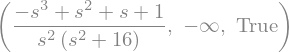

In [30]:
sol_Y = solve(ec_alg, Y)[0]
sol_Y

Finalmente, realizamos la transformación inversa para obtener $y(t)$:

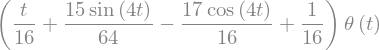

In [31]:
y_sol = inverse_laplace_transform(sol_Y[0], s, t)
collect(y_sol, Heaviside(t))

Podemos interpretar la ecuación diferencial como la ecuación de movimiento de un oscilador armónico sometido a una fuerza que crece linealmente. Vamos a graficar la solución obtenida para ver que efectivamente representa una oscilación.

In [32]:
y_np = lambdify(t, y_sol, 'numpy')

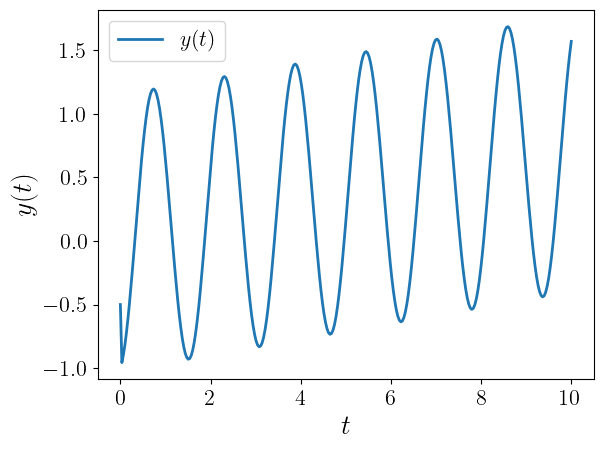

In [33]:
fig, ax = plt.subplots() 
t_n = np.linspace(0, 10, 300)
y_num = y_np(t_n)
#plt.plot(t_n, 1 + t_n, label=r"$1 + t$")
plt.plot(t_n, y_num, lw=2, label=r"$y(t)$")
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.show()